#Introdução

O presente projeto tem por objetivo a aplicação de modelo de Regressão
para prever o preço de venda de casas.
o dataset conta com 79 variáveis ​​explicativas descrevendo (quase) todos os aspectos dos imóveis residenciais em Ames, Iowa.

#Entendimento do Problema de negócio

Trata-se de problema de precificação de imóveis — ou seja, deseja prever o valor de venda de uma casa com base em suas características físicas, localização, infraestrutura, entre outros.

Objetivo de negócio:
Ajudar construtoras, imobiliárias, compradores, corretores e investidores a estimarem corretamente o valor de um imóvel com base em dados históricos. Isso pode:

* Otimizar o preço de venda, maximizando o lucro e reduzindo o tempo no mercado.

* Evitar subavaliação ou superavaliação de imóveis.

* Auxiliar bancos na avaliação de garantias de crédito imobiliário.

* Automatizar processos em plataformas digitais de venda e aluguel de imóveis.

# Entendimento dos Dados

In [ ]:
### Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

#### Lendo os dados disponibilizados

In [ ]:
df_train = pd.read_csv ('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/train.csv')

In [ ]:
df_test = pd.read_csv ('/content/drive/MyDrive/PodAcademy/Tarefas/Regressao/House_Prices/test.csv')

In [ ]:
# verificando a quantidade de linhas e colunas

print(f"O dataframe possui {df_train.shape[0]} linhas e {df_train.shape[1]} colunas. ")

O dataframe possui 1460 linhas e 81 colunas. 


In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
# Metadados

# Construindo função para obter metadados
def metadados(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
# Obtendo metadados

metadados_df = metadados(df_train)
metadados_df.head(100)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,HeatingQC,object,0,0.00,5
1,Fence,object,1179,80.75,4
2,ExterQual,object,0,0.00,4
3,FireplaceQu,object,690,47.26,5
4,Foundation,object,0,0.00,6
5,BsmtQual,object,37,2.53,4
6,BsmtCond,object,37,2.53,4
7,BsmtExposure,object,38,2.60,4
8,BsmtFinType1,object,37,2.53,6
9,MiscFeature,object,1406,96.30,4


In [ ]:
# Análise estatística para os dados numéricos

df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
# Análise das variáveis qualitativas

df_train.describe(include=["object"]).T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


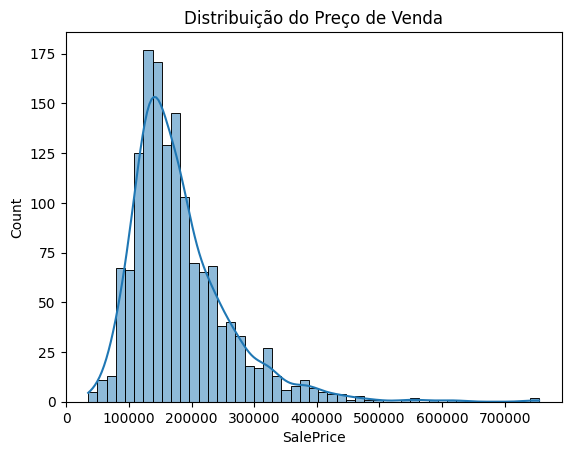

In [ ]:
# Distribuição dos preços de venda
sns.histplot(df_train['SalePrice'], kde=True)
plt.title("Distribuição do Preço de Venda")
plt.show()


In [ ]:
# Análise estatística para a variável target
df_train['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


### Quais variáveis possuem maior correlação com SalePrice?

In [ ]:
### verificando a correlação entre variáveis

numeric_df = df_train.select_dtypes(include=['int64', 'float64'])
numeric_df = numeric_df.drop(columns=['Id'])

# Correlação com SalePrice
correlations = numeric_df.corr(method='pearson')['SalePrice'].sort_values(ascending=False)
correlations

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


### Quais regiões tem as casas mais valorizadas?

In [ ]:
# Top 10 bairos mais valorizados

bairro_valorizado_df = (
    df_train.groupby('Neighborhood', as_index=False)
    .agg(
        Preco_Medio_Venda=('SalePrice', 'mean'),
        Qtde_Casas=('SalePrice', 'count')
    )
    .sort_values(by='Preco_Medio_Venda', ascending=False)
    .reset_index(drop=True)  # Corrigir o índice
)

# Exibir os top 10 bairros mais valorizados
top_10_bairros = bairro_valorizado_df.head(10)
top_10_bairros

,Neighborhood,Preco_Medio_Venda,Qtde_Casas
0,NoRidge,335295.317073,41
1,NridgHt,316270.623377,77
2,StoneBr,310499.000000,25
3,Timber,242247.447368,38
4,Veenker,238772.727273,11
5,Somerst,225379.837209,86
6,ClearCr,212565.428571,28
7,Crawfor,210624.725490,51
8,CollgCr,197965.773333,150
9,Blmngtn,194870.882353,17


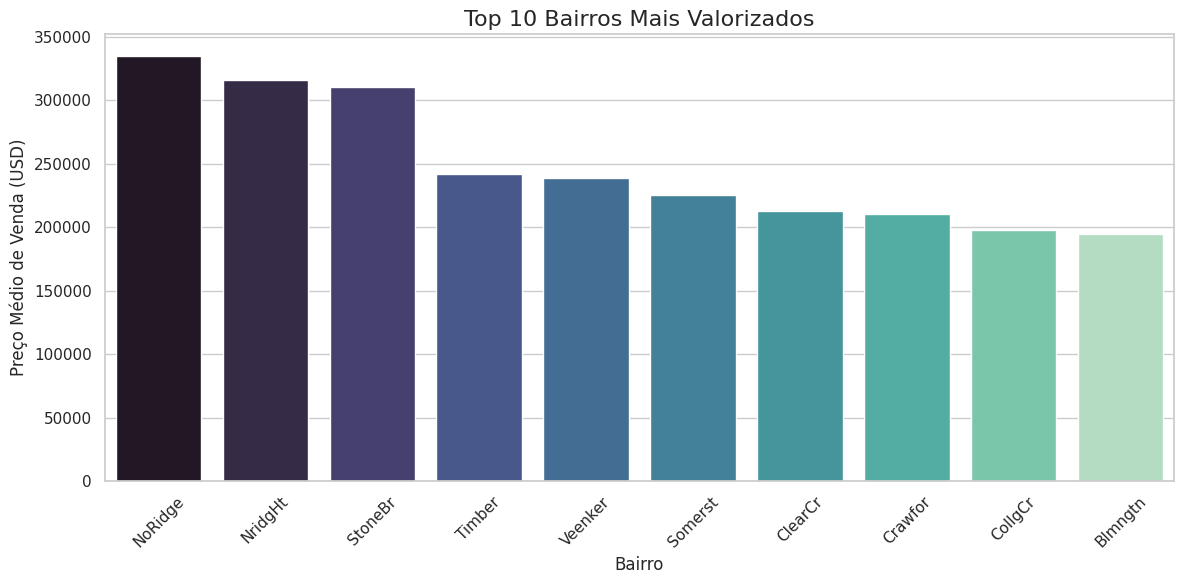

In [ ]:
# Definir o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_bairros,
    x='Neighborhood',
    y='Preco_Medio_Venda',
    palette='mako'
)

# Adicionar rótulos e título
plt.title('Top 10 Bairros Mais Valorizados', fontsize=16)
plt.xlabel('Bairro', fontsize=12)
plt.ylabel('Preço Médio de Venda (USD)', fontsize=12)
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()


 ### Existe sazonalidade nas vendas?

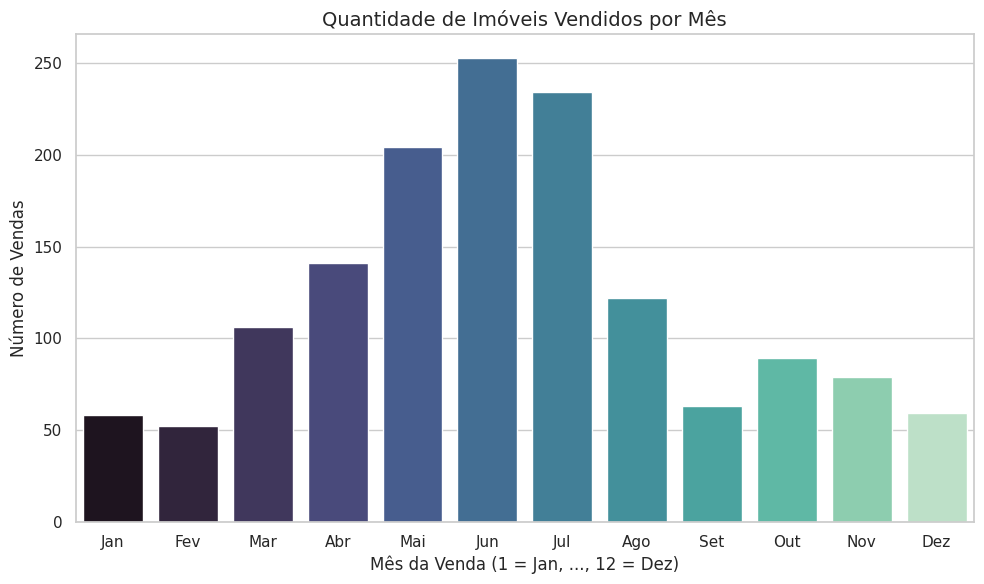

In [ ]:
# Ajustar estilo do gráfico
sns.set(style="whitegrid")

# Contagem de imóveis vendidos por mês
vendas_por_mes = df_train['MoSold'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_por_mes.index, y=vendas_por_mes.values, palette='mako')

plt.title('Quantidade de Imóveis Vendidos por Mês', fontsize=14)
plt.xlabel('Mês da Venda (1 = Jan, ..., 12 = Dez)', fontsize=12)
plt.ylabel('Número de Vendas', fontsize=12)
plt.xticks(range(0, 12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.tight_layout()
plt.show()

### Qual o preço médio por mês

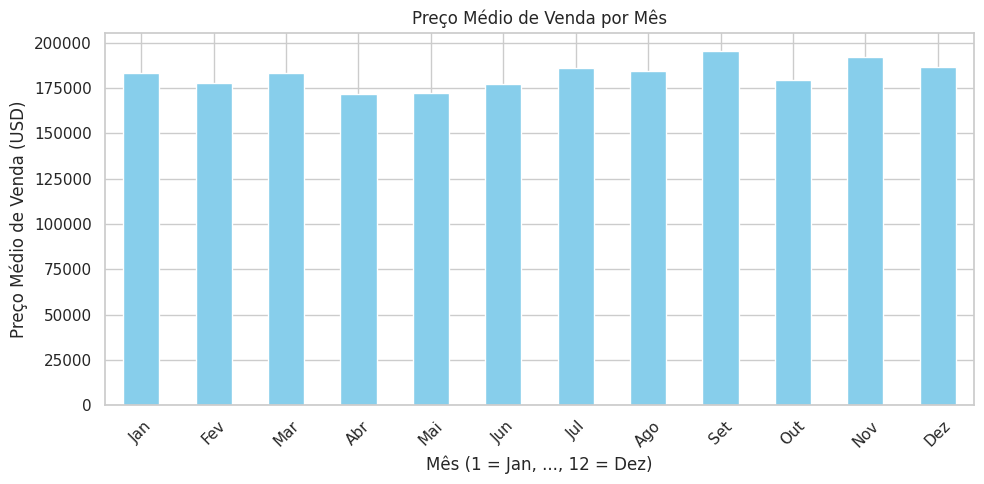

In [ ]:
# Calcular preço médio de venda por mês
preco_medio_mes = df_train.groupby('MoSold')['SalePrice'].mean()

# Visualizar
preco_medio_mes.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Preço Médio de Venda por Mês')
plt.xlabel('Mês (1 = Jan, ..., 12 = Dez)')
plt.ylabel('Preço Médio de Venda (USD)')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=45)
plt.tight_layout()
plt.show()

### Os bairros com maior valorização são os mesmos que mais vendem em maio–julho?

In [ ]:
# Filtrar os meses de interesse: maio (5), junho (6), julho (7)
meses_pico = [5, 6, 7]
df_pico = df_train[df_train['MoSold'].isin(meses_pico)]

# Agrupar e contar o número de vendas por bairro nesses meses
vendas_pico_bairro = (
    df_pico.groupby('Neighborhood')['SalePrice']
    .count()
    .reset_index(name='Vendas_Maio_Jun_Jul')
)

# Calcular o preço médio por bairro (base geral)
preco_medio_bairro = (
    df_train.groupby('Neighborhood')['SalePrice']
    .mean()
    .reset_index(name='Preco_Medio_Venda')
)

# Unir os dois DataFrames
analise_bairros = pd.merge(preco_medio_bairro, vendas_pico_bairro, on='Neighborhood', how='left')

# Preencher bairros sem venda nesses meses com 0
analise_bairros['Vendas_Maio_Jun_Jul'] = analise_bairros['Vendas_Maio_Jun_Jul'].fillna(0).astype(int)

# Ordenar pelos bairros mais valorizados
analise_bairros = analise_bairros.sort_values(by='Preco_Medio_Venda', ascending=False).reset_index(drop=True)

# Visualizar os top 10
analise_bairros.head(10)

,Neighborhood,Preco_Medio_Venda,Vendas_Maio_Jun_Jul
0,NoRidge,335295.317073,22
1,NridgHt,316270.623377,28
2,StoneBr,310499.000000,11
3,Timber,242247.447368,17
4,Veenker,238772.727273,7
5,Somerst,225379.837209,35
6,ClearCr,212565.428571,13
7,Crawfor,210624.725490,22
8,CollgCr,197965.773333,66
9,Blmngtn,194870.882353,8


### Quais foram os bairros que mais venderam nos meses de Maio a Junho?

In [ ]:
# Filtrar os meses de interesse: maio (5), junho (6), julho (7)
meses_pico = [5, 6, 7]
df_pico = df_train[df_train['MoSold'].isin(meses_pico)]

# Contar número de vendas por bairro nesses meses
bairros_mais_vendas_pico = (
    df_pico['Neighborhood']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Neighborhood', 'Neighborhood': 'Total_Vendas_Maio_Jun_Jul'})
)

# Exibir os top 10 bairros com mais vendas nesses meses
bairros_mais_vendas_pico.head(10)


,Total_Vendas_Maio_Jun_Jul,count
0,NAmes,118
1,CollgCr,66
2,OldTown,54
3,Edwards,45
4,Gilbert,42
5,Somerst,35
6,BrkSide,34
7,Sawyer,32
8,NWAmes,30
9,SawyerW,28
